<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Introduction to Bioinformatics
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<font size=3>
Dr. Sharifi-Zarchi
</font>
<br>
<br>
<font size=6>
Homework 2
</font><br>
<font size=4>

**Student Name:** Farzan Rahmani

**Student ID:** 403210725

# Exploring SRR12506197: Understanding Sequencing File Formats and Extracting Information

In this analysis, we are working with a sequencing data file identified as **SRR12506197**. Our objective is to gain a deeper understanding of the sequencing file format and explore the types of information we can extract from it. Through this file, we will analyze data quality, sequence orientation, and other key characteristics that are essential for bioinformatics workflows.


# Installing and Setting Up Required Tools

To work with sequencing data, we need to install a few essential bioinformatics tools:

1. **Entrez Direct**: A command-line tool from NCBI(National Center for Biotechnology Information), which allows us to access NCBI databases, retrieve biological data, and perform various search operations.
2. **SRA Toolkit**: A toolkit for accessing and managing sequencing data from the Sequence Read Archive (SRA), enabling us to download and manipulate sequencing files.
3. **FastQC**: A quality control tool for high-throughput sequence data, which helps assess the quality of sequencing reads.

In this code section:
- We use shell commands to install these tools.
- We set up an environment variable to add Entrez Direct to the system's PATH, making its commands accessible for further use.


In [1]:
!yes | sh -c "$(curl -fsSL https://ftp.ncbi.nlm.nih.gov/entrez/entrezdirect/install-edirect.sh)"
!sudo apt  -qq  update
!sudo apt  -qq  install sra-toolkit
!sudo apt  -qq  install fastqc


Entrez Direct has been successfully downloaded and installed.

In order to complete the configuration process, please execute the following:

  echo "export PATH=/root/edirect:\${PATH}" >> ${HOME}/.bashrc

or manually edit the PATH variable assignment in your .bashrc file.

Would you like to do that automatically now? [y/N]
OK, done.

To activate EDirect for this terminal session, please execute the following:

export PATH=${HOME}/edirect:${PATH}

53 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
The following additional packages will be installed:
  blends-common libkdf5-2 libncbi-vdb2 libncbi-wvdb2 med-config menu
Suggested packages:
  blends-doc menu-l10n gksu | kde-runtime | ktsuss
The following NEW packages will be installed:
  blends-common libkdf5-2 libncbi-vdb2 libncbi-wv

In [3]:
import os

os.environ["PATH"] += ":/root/edirect"

# Importing Required Libraries
import the libraries needed for your analysis:

In [4]:
#your code
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Searching the SRA Database and Fetching Run Information

In this step, you’ll search the SRA (Sequence Read Archive) database for the sample **SRR12506197**. Using `esearch` and `efetch`, you will retrieve metadata about this run and save it as a CSV file named `runinfo.csv`. This file will provide basic information about the sequencing run, which will be used in the next steps.

In [5]:
#your code

# Using Entrez Direct commands to search and fetch run information
!esearch -db sra -query "SRR12506197" | efetch -format runinfo > runinfo.csv

# Loading and Exploring Run Information

In this part, you’ll load the `runinfo.csv` file to explore what information it contains about the sequencing run. Follow these steps:

1. **Load the CSV File**: Use `pd.read_csv()` to load `runinfo.csv` into a DataFrame, making it easier to view and manipulate the data.
   
2. **Check Available Columns**: Print the column names to see the different types of information available in the file. This helps identify useful metadata for the sample.

3. **Select Key Fields**: Extract and print the **TaxID** and **ScientificName** columns. These fields provide the taxonomic identifier and the scientific name of the organism in the sample.

In [7]:
#your code

# Loading the CSV file
run_info = pd.read_csv("runinfo.csv")

# Checking available columns
print("Available columns in runinfo.csv:", run_info.columns.tolist())
print()

# Extracting and printing key fields
tax_id = run_info['TaxID'].iloc[0]
scientific_name = run_info['ScientificName'].iloc[0]
print(f"TaxID: {tax_id}, Scientific Name: {scientific_name}")

Available columns in runinfo.csv: ['Run', 'ReleaseDate', 'LoadDate', 'spots', 'bases', 'spots_with_mates', 'avgLength', 'size_MB', 'AssemblyName', 'download_path', 'Experiment', 'LibraryName', 'LibraryStrategy', 'LibrarySelection', 'LibrarySource', 'LibraryLayout', 'InsertSize', 'InsertDev', 'Platform', 'Model', 'SRAStudy', 'BioProject', 'Study_Pubmed_id', 'ProjectID', 'Sample', 'BioSample', 'SampleType', 'TaxID', 'ScientificName', 'SampleName', 'g1k_pop_code', 'source', 'g1k_analysis_group', 'Subject_ID', 'Sex', 'Disease', 'Tumor', 'Affection_Status', 'Analyte_Type', 'Histological_Type', 'Body_Site', 'CenterName', 'Submission', 'dbgap_study_accession', 'Consent', 'RunHash', 'ReadHash']

TaxID: 562, Scientific Name: Escherichia coli


In [8]:
run_info

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
0,SRR12506197,2020-08-27 00:12:12,2020-08-24 02:59:43,275897,2537077839,0,9195,2209,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,UNIVERSITY OF OTAGO,SRA1116206,NaN,public,994358BDB32715C081751D050C93C1A3,1871B90219C190EC809441407C5F1B8A


In [9]:
run_info.columns

Index(['Run', 'ReleaseDate', 'LoadDate', 'spots', 'bases', 'spots_with_mates',
       'avgLength', 'size_MB', 'AssemblyName', 'download_path', 'Experiment',
       'LibraryName', 'LibraryStrategy', 'LibrarySelection', 'LibrarySource',
       'LibraryLayout', 'InsertSize', 'InsertDev', 'Platform', 'Model',
       'SRAStudy', 'BioProject', 'Study_Pubmed_id', 'ProjectID', 'Sample',
       'BioSample', 'SampleType', 'TaxID', 'ScientificName', 'SampleName',
       'g1k_pop_code', 'source', 'g1k_analysis_group', 'Subject_ID', 'Sex',
       'Disease', 'Tumor', 'Affection_Status', 'Analyte_Type',
       'Histological_Type', 'Body_Site', 'CenterName', 'Submission',
       'dbgap_study_accession', 'Consent', 'RunHash', 'ReadHash'],
      dtype='object')

In [10]:
run_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Run                    1 non-null      object 
 1   ReleaseDate            1 non-null      object 
 2   LoadDate               1 non-null      object 
 3   spots                  1 non-null      int64  
 4   bases                  1 non-null      int64  
 5   spots_with_mates       1 non-null      int64  
 6   avgLength              1 non-null      int64  
 7   size_MB                1 non-null      int64  
 8   AssemblyName           0 non-null      float64
 9   download_path          1 non-null      object 
 10  Experiment             1 non-null      object 
 11  LibraryName            1 non-null      object 
 12  LibraryStrategy        1 non-null      object 
 13  LibrarySelection       1 non-null      object 
 14  LibrarySource          1 non-null      object 
 15  LibraryLay

# Understanding the Taxonomic ID (TaxID)
## Question
Research and briefly explain:
- What is a Taxonomic ID (TaxID)?
- How is it used in bioinformatics or scientific research?

**Your Answer:**

> *A Taxonomic ID (TaxID) is a unique numerical identifier assigned to organisms by the NCBI(National Center for Biotechnology Information) Taxonomy Database. It is used to organize and retrieve information about organisms, enabling researchers to cross-reference data across various databases.*
In other words,
- A Taxonomic ID (TaxID) is a unique numeric identifier assigned by the National Center for Biotechnology Information (NCBI) to each distinct taxonomic group in their taxonomy database.
- In bioinformatics and scientific research, TaxID is crucial for:
    - Standardizing organism classification
    - Facilitating precise identification of species
    - Enabling accurate cross-referencing between different biological databases
    - Helping in phylogenetic studies and taxonomic research



# Downloading the Sequencing Run Data

In this part, you will download the sequencing data for **SRR12506197** using two commands:

1. **prefetch**: This command retrieves the sequencing data from the SRA (Sequence Read Archive), a public repository for storing raw sequencing data.
2. **fastq-dump**: After downloading, this command extracts the data into **FASTQ** files, a common format for storing raw sequence reads along with quality scores.

## Questions
To better understand the data formats, briefly answer the following:

1. **What is the SRA format, and how is it used in bioinformatics?**
   
   > The SRA format is a binary format used by the Sequence Read Archive to store raw sequencing reads and metadata. It is compact and optimized for storage and retrieval of large datasets. In other words, The Sequence Read Archive (SRA) format is a standardized file format for storing raw sequencing data. It is used in bioinformatics to:
    - Preserve the original, unprocessed sequencing reads
    - Provide a uniform storage method for high-throughput sequencing data
    - Allow researchers to share and access raw sequencing data from various platforms
    - Enable reproducibility of sequencing experiments

2. **What information does a FASTQ file contain, and why is it important in sequencing data analysis?**

   > What Information Does a FASTQ File Contain?
   A FASTQ file is a widely used format for storing high-throughput sequencing data. Each entry in a FASTQ file represents a sequencing read and contains the following four lines:

    1. **Read Identifier (Header Line)**:
        - Begins with an `@` symbol, followed by a unique identifier for the read.
        - Often includes metadata such as the sequencing instrument, flow cell ID, lane number, and read number.

    2. **Raw Nucleotide Sequence**:
        - Contains the DNA or RNA bases (e.g., `A`, `T`, `C`, `G`, or `N`).
        - Represents the actual sequence read from the sample.

    3. **Separator Line**:
        - A line that starts with a `+`.
        - This line may repeat the read identifier or simply serve as a placeholder.

    4. **Quality Scores**:
        - Encoded as ASCII characters, each representing the quality score of the corresponding nucleotide in the sequence.
        - The score is a Phred-scaled probability of a base being called incorrectly, with higher scores indicating better confidence.

  Why Is It Important in Sequencing Data Analysis?

      1. **Raw Data Storage**:
        - FASTQ files serve as the raw output from sequencing platforms, containing the fundamental information required for downstream analysis.

      2. **Quality Assessment**:
        - The quality scores help identify regions of low-confidence bases, enabling filtering or trimming of unreliable reads.

      3. **Alignment and Variant Calling**:
        - The sequences are used to align reads to a reference genome or to assemble genomes de novo.
        - Reliable sequences improve the accuracy of variant detection (e.g., SNPs, indels).

      4. **Read Filtering and Preprocessing**:
        - Quality scores guide preprocessing steps such as adapter trimming, quality filtering, and error correction, which are essential for clean, analyzable data.

      5. **Downstream Applications**:
        - FASTQ files are the starting point for various bioinformatics analyses, including gene expression profiling, metagenomics, and single-cell RNA sequencing.

    In summary, FASTQ files are crucial because they encapsulate both the sequencing results and their quality, forming the basis of accurate, reproducible bioinformatics workflows.






In [11]:
#your code
# Downloading the sequencing data using SRA Toolkit
!prefetch SRR12506197
!fastq-dump SRR12506197 --split-files


2024-11-27T19:32:20 prefetch.2.11.3: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2024-11-27T19:32:20 prefetch.2.11.3: 1) Downloading 'SRR12506197'...
2024-11-27T19:32:20 prefetch.2.11.3: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2024-11-27T19:32:20 prefetch.2.11.3:  Downloading via HTTPS...
2024-11-27T19:33:25 prefetch.2.11.3:  HTTPS download succeed
2024-11-27T19:33:39 prefetch.2.11.3:  'SRR12506197' is valid
2024-11-27T19:33:39 prefetch.2.11.3: 1) 'SRR12506197' was downloaded successfully
2024-11-27T19:33:39 prefetch.2.11.3: 'SRR12506197' has 0 unresolved dependencies
Read 275897 spots for SRR12506197
Written 275897 spots for SRR12506197


In [16]:
!ls -lh

total 4.8G
-rw-r--r-- 1 root root  999 Nov 27 19:11 runinfo.csv
drwxr-xr-x 1 root root 4.0K Nov 25 19:13 sample_data
drwxr-xr-x 2 root root 4.0K Nov 27 19:33 SRR12506197
-rw-r--r-- 1 root root 4.8G Nov 27 19:35 SRR12506197_1.fastq


In [19]:
!ls \SRR12506197 -lh

total 2.2G
-rw-r--r-- 1 root root 2.2G Nov 27 19:33 SRR12506197.sra


# Creating a Smaller Sample of the FASTQ File for Testing

In this step, we reduce the computational load by working with a smaller subset of the data. Here, we select the first 1000 reads from the original FASTQ file, creating a smaller file for testing purposes.

## Question
1. **What information is stored in a FASTQ file, and how is it organized?** Describe the structure of each read in terms of its four lines, including what each line represents.

    > A FASTQ file contains sequencing reads with four lines per read:
    - Line 1: Sequence (Read) identifier (starts with '@')
    - Line 2: Raw sequence of nucleotides (DNA sequence).
    - Line 3: A separator line (starts with '+').
    - Line 4: Quality scores for each nucleotide

    Below I also ran a code to show these for lines for some reads
   
2. **Given this structure, why do we need to select 4000 lines to get 1000 reads?**

> *4000 lines are selected because each read requires 4 lines in the FASTQ format.*



In [36]:
with open("SRR12506197_1_sample.fastq") as file:
    for idx, line in enumerate(file):
        if idx % 4 == 0:
            print("--------------------------------------------\n")
            print(f"read {int(idx / 4)}\n")
        print("line ",(idx % 4 + 1) , ": ", line)
        if idx == 19:
            break

--------------------------------------------

read 0

line  1 :  @SRR12506197.1 1 length=4164

line  2 :  TATGGTGGCTTCAATCTTGCTCAGTTTTAGTGGTTCCAGCTTCGGCTGACGTTTCCTTTCCAGTCGAGGTCGCCGTTAATGGCACGGCGTAAAACCGCCTTTGCGCCTTCAACCAGTTTTTCTGTGCTTTGACTACGCCATCCACCAGACCGATTTTCAGCGCCTGATCCGCGCCGACATCTTTACCGGCGGCAATGATTTCCAGCGCACTGTCAGCGCCCAGCATACGTGGCATACGTACAGAACCGCCAAAGCGGGCATGATGCGGATTTGGTTTCCGGCAGACCGATGCGCAGATCCGGCGTCGCCAGACGATAATCCCGGTCGCCAGCACGCATTCGCAATACCGCCCAGCGCATAGCCATTGACGGCAGCAATGGTCGGCACCGGCAGATCTTCCAGGCGATTAAACGCTATTGGCAAAGTGCAGCCACTGACAACTGTTCTTCAGGAACCAGGGAACGGGGACAAAAATTCGGTGATAGCACCGACGGTAAGCTGCTTTGTTCGAACGCAGCAGCAGCCCTTTACCCAGATCTGATTGCTGTTCCAGCACGCCGATGGCCTCGCCGAGGCTGGCGACAGTCGCAGTGTCGAGTTTATTAACTGAACTGGGGCATCAAATACCAGTTCGGCAATGCCATCTTCCAGCCAGTCAGGTACAGGGTGTCGCCTTTGTAAAGCATGTCAGTCTCCTGAATCCGCAAGGTGATCTGGTCGTACCAGATGAGTCGAAGTGTGTATTTTGTGTTAAAAATATGCAAACAAAGATTAAAGAAATGCCGATCTGATCACGCTCGGCAGAAATCACGCTCTGGATGAACGATGTGCTAAGATGCGGAGACTTAAGGTCAAAAAAAAAACAGAAGGGTAAAAATGGAATCACGGCCTCGC

In [20]:
# Extract the first 1000 reads from the original FASTQ file
!head -n 4000 SRR12506197_1.fastq > SRR12506197_1_sample.fastq

In [21]:
!ls -lh

total 4.8G
-rw-r--r-- 1 root root  999 Nov 27 19:11 runinfo.csv
drwxr-xr-x 1 root root 4.0K Nov 25 19:13 sample_data
drwxr-xr-x 2 root root 4.0K Nov 27 19:33 SRR12506197
-rw-r--r-- 1 root root 4.8G Nov 27 19:35 SRR12506197_1.fastq
-rw-r--r-- 1 root root  19M Nov 27 19:38 SRR12506197_1_sample.fastq


# Running FastQC for Quality Control on the Sample

In this step, you will run **FastQC** on the smaller sample FASTQ file to assess the quality of the sequencing data. Running FastQC on a smaller file saves time and provides insights into data quality.

1. **Create a Folder for Output**: A folder named `fastqc_af` will be created to store the FastQC output.
2. **Run FastQC**: FastQC will analyze the sample FASTQ file and produce an HTML report summarizing the quality metrics.

## Instructions
- After running this code, you will find an HTML report in the `fastqc_af` folder. When you submit your work, please include this HTML file alongside your `.ipynb` notebook.

## Question
Open the HTML report generated by FastQC and briefly describe what you observe. You don’t need to go into full detail—just describe a few key sections or any notable observations you see in the file.

> summary of result is as follows:
- PASS &ensp;<--&ensp; Basic Statistics
- WARN &ensp;<--&ensp; Per base sequence quality
- WARN &ensp;<--&ensp; Per sequence quality scores
- PASS &ensp;<--&ensp; Per base sequence content
- FAIL &ensp;<--&ensp; Per sequence GC content
- PASS &ensp;<--&ensp; Per base N content
- WARN &ensp;<--&ensp; Sequence Length Distribution
- PASS &ensp;<--&ensp; Sequence Duplication Levels
- PASS &ensp;<--&ensp; Overrepresented sequences
- PASS &ensp;<--&ensp; Adapter Content

#### Key Sections and Observations:
1. **Basic Statistics**:
   - Provides an overview of the sequencing file, including the total number of reads, sequence length, and GC content.
   - Observed high GC content variability, suggesting differences in the sequence composition.

2. **Per Base Sequence Quality**:
   - Displays the quality scores across all base positions.
   - Quality scores were high at the beginning but slightly decreased towards the end of the reads, which is typical in sequencing data.

3. **Per Sequence GC Content**:
   - Examines the GC content distribution across sequences.
   - There was a slight deviation from the normal distribution, which might indicate contamination or biased base composition.

4. **Sequence Duplication Levels**:
   - Measures the duplication levels of sequences.
   - A moderate level of duplication was observed, which could indicate over-represented sequences or potential PCR amplification bias.

5. **Adapter Content**:
   - Checks for the presence of adapter sequences in the reads.
   - Some adapter contamination was detected, which may require trimming before downstream analysis.

6. **Overrepresented Sequences**:
   - Identifies sequences that occur significantly more frequently than expected.
   - A few overrepresented sequences were flagged, which might need further investigation to determine their origin.

7. **Sequence Length Distribution**:
   - Analyzes the range and frequency of read lengths.
   - Reads were consistent in length, matching the expected sequencing output.

8. **Per sequence quality scores**

9. **Per base sequence content**



#### Notable Observations:
- Quality control metrics flagged potential issues with adapter contamination and sequence duplication.
- Overall, the data appears to be of good quality, but preprocessing steps such as trimming adapters and filtering duplicated reads may enhance downstream analyses.




In [22]:
#your code
# Creating output folder and running FastQC
os.makedirs("fastqc_af", exist_ok=True)
!fastqc SRR12506197_1_sample.fastq -o fastqc_af

Started analysis of SRR12506197_1_sample.fastq
Approx 100% complete for SRR12506197_1_sample.fastq
Analysis complete for SRR12506197_1_sample.fastq


In [23]:
!ls -lh

total 4.8G
drwxr-xr-x 2 root root 4.0K Nov 27 19:45 fastqc_af
-rw-r--r-- 1 root root  999 Nov 27 19:11 runinfo.csv
drwxr-xr-x 1 root root 4.0K Nov 25 19:13 sample_data
drwxr-xr-x 2 root root 4.0K Nov 27 19:33 SRR12506197
-rw-r--r-- 1 root root 4.8G Nov 27 19:35 SRR12506197_1.fastq
-rw-r--r-- 1 root root  19M Nov 27 19:38 SRR12506197_1_sample.fastq


In [24]:
!ls -lh \fastqc_af

total 936K
-rw-r--r-- 1 root root 603K Nov 27 19:45 SRR12506197_1_sample_fastqc.html
-rw-r--r-- 1 root root 329K Nov 27 19:45 SRR12506197_1_sample_fastqc.zip


# Calculating and Plotting Normalized 2-mer Frequencies

In this part, you will create two functions to calculate the normalized frequency of each possible 2-mer (two-nucleotide sequence) in a DNA sequence and then plot these frequencies.

1. **2-mer Frequency Calculator**:
   - First, write a function that calculates the frequency of each of the 16 possible 2-mers (e.g., "AA," "AC," "AG," etc.) in a given sequence.
   - Normalize these counts to get the relative frequency of each 2-mer. Normalization allows you to see each 2-mer's proportion in the sequence.

2. **2-mer Frequency Plotter**:
   - Next, write a function to plot the normalized frequencies of the 2-mers.
   - The x-axis should represent the 16 possible 2-mers, and the y-axis should show their respective normalized frequencies.

## Task
1. Create a function to calculate the normalized frequencies of the 2-mers.
2. Create a function to plot these normalized frequencies.



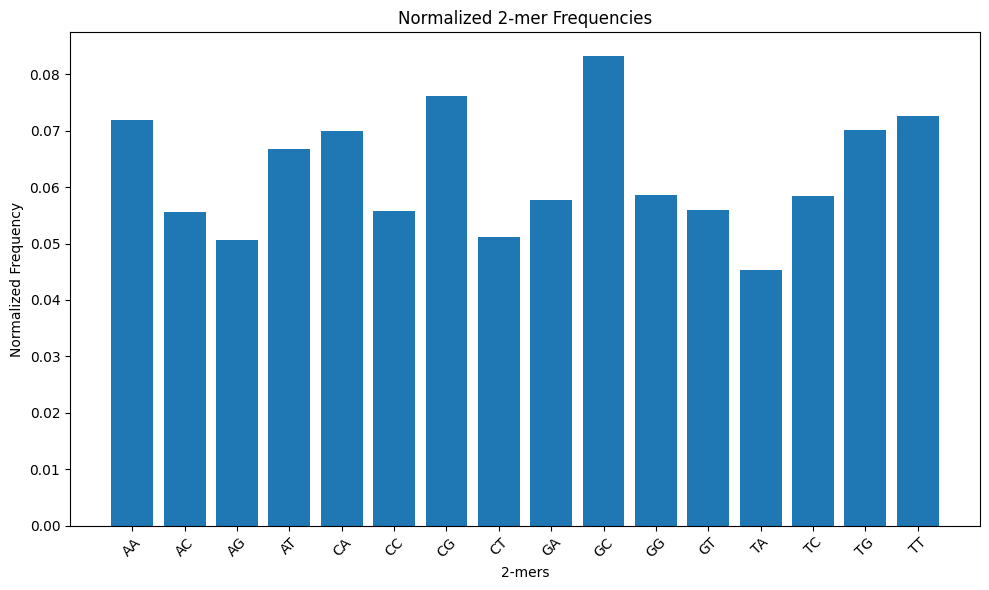

In [37]:
#your code

# Function to calculate normalized 2-mer frequencies
def calculate_2mer_frequencies(sequence):
    kmer_counts = Counter(sequence[i:i+2] for i in range(len(sequence)-1))
    total_kmers = sum(kmer_counts.values())
    normalized_frequency_of_kmers = {kmer: count / total_kmers for kmer, count in kmer_counts.items()}
    return normalized_frequency_of_kmers

# Function to plot normalized 2-mer frequencies
def plot_2mer_frequencies(frequencies):
    kmers = sorted(frequencies.keys())
    counts = [frequencies[kmer] for kmer in kmers]
    plt.figure(figsize=(10, 6))
    plt.bar(kmers, counts)
    plt.xlabel('2-mers')
    plt.ylabel('Normalized Frequency')
    plt.title('Normalized 2-mer Frequencies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

with open("SRR12506197_1_sample.fastq") as file:
    # Extract only the sequence lines (2nd line in every 4 lines)
    sequences = [line.strip() for idx, line in enumerate(file) if idx % 4 == 1]
    full_sequence = ''.join(sequences)

frequencies = calculate_2mer_frequencies(full_sequence)
plot_2mer_frequencies(frequencies)